# Testing Models: Logistic Regression #

This notebook applies logistic regression to the data set of car and bike accidents, trying to predict the presence of accidents, not the number.

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

In [2]:
# read in data set with categorical variables turned into dummy variablees
df = pd.read_csv('data/cleaned_data/md_dum.csv')

In [24]:
# create X and y values for modeling, this time using a mask to create 1 and 0 values for classification
car_c_y = df.car_acc_score.mask(df.car_acc_score > 0, 1)
car_X = df.drop(columns=['Unnamed: 0', 'car_acc_score', 'car_dens_score', 'bike_dens_score'])
bike_c_y = df.bike_acc_score.mask(df.bike_acc_score > 0, 1)
bike_X = df.drop(columns=['Unnamed: 0', 'bike_acc_score', 'car_dens_score', 'bike_dens_score'])

In [4]:
# train test split
X_car_c_train, X_car_c_test, y_car_c_train, y_car_c_test = train_test_split(car_X, car_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=car_c_y)
X_bike_c_train, X_bike_c_test, y_bike_c_train, y_bike_c_test = train_test_split(bike_X, bike_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=bike_c_y)

From here on, I will test first with car accidents to see if the model is worth running on bike accidents as well since some of the models are pretty time-consuming to apply.

### Logistic Regression ###

In [5]:
log = LogisticRegression()
log.fit(X_car_c_train, y_car_c_train)
log_score = log.score(X_car_c_test, y_car_c_test)
print('Logistic Regression Score on car accidents is: {}'.format(log_score))

Logistic Regression Score on car accidents is: 0.6460853532400953


C:\Users\linne\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [10]:
# performing a Grid Search to determine the right max_iter

params = {'max_iter': [1000, 10000, 100000]}
cv = GridSearchCV(log, params)
cv.fit(X_car_c_train, y_car_c_train)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_car_c_test, y_car_c_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.6472096056122678
Tuned Model Parameters: {'max_iter': 1000}


C:\Users\linne\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
# performing a loop because I'm not sure that gave me what I want, nor am I sure which time through the
# warning is from

max_iters = [1000, 10000, 100000]
for mi in max_iters:
    log = LogisticRegression(max_iter=mi)
    log.fit(X_car_c_train, y_car_c_train)
    log_score = log.score(X_car_c_test, y_car_c_test)
    print('Logistic Regression Score on car accidents with max_iter = {} is : {}'.format(mi, log_score))

C:\Users\linne\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Score on car accidents with max_iter = 1000 is : 0.6472096056122678
Logistic Regression Score on car accidents with max_iter = 10000 is : 0.645365831721905
Logistic Regression Score on car accidents with max_iter = 100000 is : 0.645365831721905


In [22]:
#Looks like 10000 is enough, now trying some values between 1000 and 10000
max_iters = [1200, 1500, 2000, 5000, 10000]
for mi in max_iters:
    log = LogisticRegression(max_iter=mi)
    log.fit(X_car_c_train, y_car_c_train)
    log_score = log.score(X_car_c_test, y_car_c_test)
    print('Logistic Regression Score on car accidents with max_iter = {} is : {}'.format(mi, log_score))

Logistic Regression Score on car accidents with max_iter = 1200 is : 0.645365831721905
Logistic Regression Score on car accidents with max_iter = 1500 is : 0.645365831721905
Logistic Regression Score on car accidents with max_iter = 2000 is : 0.645365831721905
Logistic Regression Score on car accidents with max_iter = 5000 is : 0.645365831721905
Logistic Regression Score on car accidents with max_iter = 10000 is : 0.645365831721905


1200 looks like a good number. Let's look at a confusion matrix.

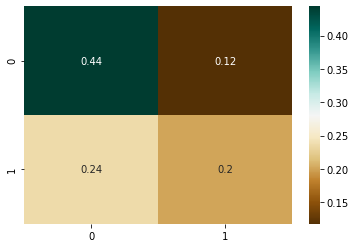

In [23]:
pred = log.predict(X_car_c_test)
c=confusion_matrix(y_car_c_test, pred, normalize='all')
sns.heatmap(c,cmap='BrBG',annot=True)

Confusion matrix shows basically the same thing which is that 12% are falsely classified as places that would have no car accidents and 24% are falsely classified as places that would have a car accident.

Now let's see how logistic regression works on bike accidents?

In [26]:
# How does logistic regression work on bike accidents? 

log = LogisticRegression(max_iter=1200)
log.fit(X_bike_c_train, y_bike_c_train)
log_score = log.score(X_bike_c_test, y_bike_c_test)
print('Logistic Regression Score on bike accidents is: {}'.format(log_score))

C:\Users\linne\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Score on bike accidents is: 0.47474929172100555


Huh, 1200 is still not great, but I'm going to wait to try to make it better until I can find a better model over all. 

The classification accuracy scores are better than the scores for any of the linear regressions, so classification may be a better task for machine learning. If these turn out to be the highest scores from all possible models, I will come back to them and tune the parameters more. [Go>>](Testing%20Models%20-%20KNN.ipynb)